In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [24]:
melbourne_file_path = 'melb_data.csv'
melbourne_data = pd.read_csv(melbourne_file_path) 
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [25]:
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [26]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.  
# Your Iowa data doesn't have missing values in the columns you use. 
# So we will take the simplest option for now, and drop houses from our data. 
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
melbourne_data = melbourne_data.dropna(axis=0)

In [27]:
#selecting predictor variable
y = melbourne_data.Price

In [72]:
#choosing features 
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]

By convention, this data is called **X**.

In [29]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [30]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


In [31]:
# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [32]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [33]:
import pygwalker as pyg

In [35]:
walker = pyg.walk(melbourne_data)

Box(children=(HTML(value='\n<div id="ifr-pyg-000620754cc85f7bM6BxVkWQPtHA0f2p" style="height: auto">\n    <hea…

In [42]:
# understand data type of various dataframe columns
melbourne_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [46]:
#one hot encoding of categorical columns
new_melbourne_data = pd.get_dummies(melbourne_data, columns=["Suburb","Type","Method","SellerG","CouncilArea","Regionname"], drop_first=True)

In [47]:
new_melbourne_data

,Address,Rooms,Price,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,...,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1,25 Bloomburg St,2,1035000.0,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,...,False,True,False,False,True,False,False,False,False,False
2,5 Charles St,3,1465000.0,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,...,False,True,False,False,True,False,False,False,False,False
4,55a Park St,4,1600000.0,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,...,False,True,False,False,True,False,False,False,False,False
6,124 Yarra St,3,1876000.0,7/05/2016,2.5,3067.0,4.0,2.0,0.0,245.0,...,False,True,False,False,True,False,False,False,False,False
7,98 Charles St,2,1636000.0,8/10/2016,2.5,3067.0,2.0,1.0,2.0,256.0,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12205,30 Sherwin St,3,601000.0,29/07/2017,35.5,3757.0,3.0,2.0,1.0,972.0,...,False,False,False,False,False,True,False,False,False,False
12206,75 Cecil St,3,1050000.0,29/07/2017,6.8,3016.0,3.0,1.0,0.0,179.0,...,False,False,False,False,False,False,False,False,True,False
12207,2/29 Dover Rd,1,385000.0,29/07/2017,6.8,3016.0,1.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,False
12209,201/152 Peel St,2,560000.0,29/07/2017,4.6,3181.0,2.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,True,False,False


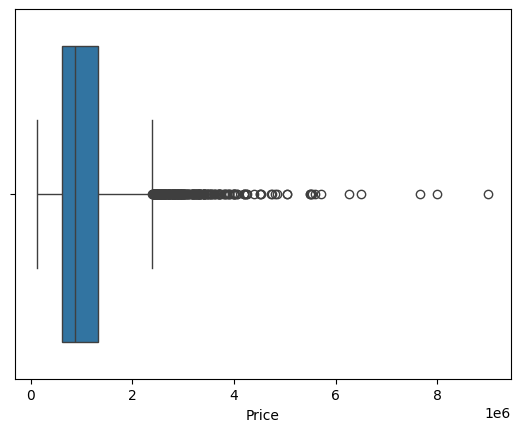

In [53]:
# check for ouliters(outlier handling)

sns.boxplot(x=new_melbourne_data['Price'])
plt.show()

q1 = new_melbourne_data['Price'].quantile(0.25)
q3 = new_melbourne_data['Price'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

new_melbourne_data = new_melbourne_data[(new_melbourne_data['Price'] > lower_bound) & (new_melbourne_data['Price'] < upper_bound)]

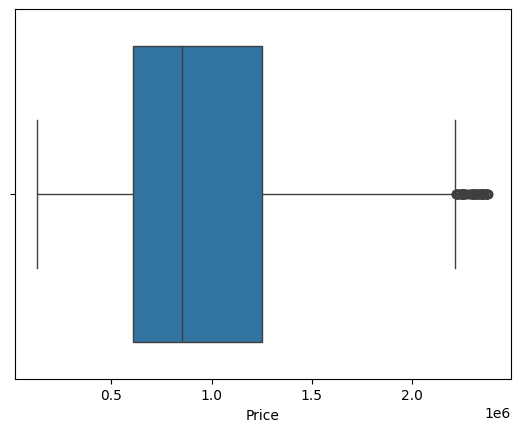

In [54]:
#Re-check data to once outliers have been removed

sns.boxplot(x=new_melbourne_data['Price'])
plt.show()

In [77]:
# starting with model building. 

#declare predictor variable
y = new_melbourne_data.Price

melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = new_melbourne_data[melbourne_features]

In [78]:
X

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.80790,144.99340
2,3,2.0,134.0,-37.80930,144.99440
4,4,1.0,120.0,-37.80720,144.99410
6,3,2.0,245.0,-37.80240,144.99930
7,2,1.0,256.0,-37.80600,144.99540
...,...,...,...,...,...
12203,3,2.0,691.0,-37.68026,144.88468
12205,3,2.0,972.0,-37.51232,145.13282
12206,3,1.0,179.0,-37.86558,144.90474
12207,1,1.0,0.0,-37.85588,144.89936


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [80]:
#checking old data before dummies got created(troubleshoot)
#declare features(independent variables)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [81]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)